### Rental house market project of Türkiye with using selenium, pandas, numpy, matplotlib in python

## 1- Web Scraping

In [3]:

# We should install and set up 'chrome driver' on computer.

# We should do 'pip install Selenium and Pandas'
import pandas as pd
import numpy as np
import selenium
import matplotlib.pyplot as plt

# Import necessary modules for web browsing with Selenium.
from selenium import webdriver
from selenium.webdriver.common.by import By

# Import functions for waiting.
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions

# Import exceptions for error handling.
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException


#### LIST OF TURKIYE DISTRICTS

In [2]:
# Create a Chrome WebDriver instance to open a new Chrome window.
driver = webdriver.Chrome()

# Create a WebDriverWait instance to wait for elements on the web page.
wait = WebDriverWait(driver, 4)

# Open the website.
driver.get("https://www.drdatastats.com/turkiye-il-ve-ilceler-listesi/")

# Create a list to store the information to be extracted from the website.
ilce_list = []

# Wait until the table is visible on the page.
wait.until(expected_conditions.visibility_of_element_located((By.XPATH, "/html/body/div[5]/div[2]/div/div[2]/div/div/article/div[3]/figure[1]/table/tbody")))

# Find all the rows in the table.
rows = driver.find_elements(By.XPATH, "/html/body/div[5]/div[2]/div/div[2]/div/div/article/div[3]/figure[1]/table/tbody/tr")

# Iterate through the rows in the table.
for i in range(len(rows)-1):
    
    # Extract the XPath for the district (ilçe).
    ilce_path = f"/html/body/div[5]/div[2]/div/div[2]/div/div/article/div[3]/figure[1]/table/tbody/tr[{i+2}]/td[3]"
    
    # Find and extract the district (ilçe) text.
    ilce = driver.find_element(By.XPATH, ilce_path)
    ilce = ilce.text
    
    # Check if the district is not "Merkez" and add it to the list directly.
    if ilce != "Merkez":
        ilce_list.append(ilce)
        
    # If it's "Merkez," also extract the province (il) and combine them.    
    else:
        il_path = f"/html/body/div[5]/div[2]/div/div[2]/div/div/article/div[3]/figure[1]/table/tbody/tr[{i+2}]/td[2]"
        il = driver.find_element(By.XPATH, il_path)
        il = il.text
        ilce_list.append((il + " " + ilce))

driver.quit()

In [148]:
print(ilce_list[:10])
print(ilce_list[len(ilce_list)-1])

['Aladağ', 'Ceyhan', 'Çukurova', 'Feke', 'İmamoğlu', 'Karaisalı', 'Karataş', 'Kozan', 'Pozantı', 'Saimbeyli']
Zonguldak Merkez


#### RENTAL HOUSING ADVERTISEMENTS IN EVERY DISTRICT

In [ ]:
# Open a Chrome window - create a driver instance.
driver = webdriver.Chrome()

# Create a WebDriverWait instance to wait for elements on the web page.
wait = WebDriverWait(driver, 5)

# Open the website.
driver.get("https://www.emlakjet.com/kiralik-konut/")

# Close the pop-up bar that appears at the bottom of the first page.
close_button = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[3]/div[5]/div[2]/div/button/span[1]")
close_button.click()

# Create a list to store the information to be extracted from the website.
list_before_excel = []

# Turn through the district list.
for j in range(446, len(ilce_list)):
    
        # Wait for the district input field to be clickable. Click and write district to input.
    wait.until(expected_conditions.element_to_be_clickable((By.XPATH, "/html/body/div/div/div[3]/div[1]/div/div[5]/div/div/div[2]/div[2]/div/input")))
    ilce_input = driver.find_element(By.XPATH, "/html/body/div/div/div[3]/div[1]/div/div[5]/div/div/div[2]/div[2]/div/input")
    ilce_input.click()                          
    ilce_input.send_keys(ilce_list[j])
 
    # Wait for the search button to be clickable and click.
    wait.until(expected_conditions.element_to_be_clickable((By.XPATH, "html/body/div/div/div[3]/div[1]/div/div[5]/div/div/button")))
    search_button = driver.find_element(By.XPATH, "html/body/div/div/div[3]/div[1]/div/div[5]/div/div/button")
    search_button.click()
    
    # Turn all pages for one district.
    for one_page in range(40):
        try:
            try:
                # Find elements with the class name of the advert listings on the first page.
                wait.until(expected_conditions.visibility_of_all_elements_located((By.CLASS_NAME, "manJWF")))
                elements = driver.find_elements(By.CLASS_NAME, "manJWF")
                
                # Turn through advert boxes on a page.
                for element in elements:
                    # Append advert information to list.
                    list_before_excel.append(element.text.split("\n"))

                # Click the "Next" button to go to the next page.      
                wait.until(expected_conditions.visibility_of_all_elements_located((By.CLASS_NAME, "_3au2n_.OTUgAO")))
                next_button = driver.find_element(By.CLASS_NAME, "_3au2n_.OTUgAO")
                next_button.click()                                  
                
            # if StaleElementReferenceException occurs refresh web page and run same codes above       
            except StaleElementReferenceException:
                driver.refresh()
                
                # Find elements with the class name of the property listings on the first page.
                wait.until(expected_conditions.visibility_of_all_elements_located((By.CLASS_NAME, "manJWF")))
                elements = driver.find_elements(By.CLASS_NAME, "manJWF")
                
                # Iterate through property listings on one page.
                for element in elements:
                    # Append property information to the list.
                    list_before_excel.append(element.text.split("\n"))

                # Find the 'next_button' again.   
                wait.until(expected_conditions.visibility_of_all_elements_located((By.CLASS_NAME, "_3au2n_.OTUgAO")))
                next_button = driver.find_element(By.CLASS_NAME, "_3au2n_.OTUgAO")
                next_button.click()
                
        # İf there aren't 'advert' or 'next_button' in page, move to next district.            
        # So if these errors occurs from the try block above; remove the (il, ilçe) and break loop    
        except (NoSuchElementException, TimeoutException, IndexError):
            try:
                # If (il, ilce) cancel buttons are not found(NoSuchElementException), change to second path and try again
                remove_ilce = driver.find_element(By.XPATH, "/html/body/div/div/div[3]/div[1]/div/div[5]/div/div/div[2]/div[2]/div/div[1]/i")
                remove_ilce.click()                     
                remove_il = driver.find_element(By.XPATH, "/html/body/div/div/div[3]/div[1]/div/div[5]/div/div/div[2]/div[2]/div/div/i")
                remove_il.click()                          
            except NoSuchElementException:
                remove_ilce = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[3]/div[1]/div/div[5]/div/div/div[2]/div[2]/div/div[1]/i")
                remove_ilce.click()                          
                remove_il = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[3]/div[1]/div/div[5]/div/div/div[2]/div[2]/div/div/i")
                remove_il.click()                
                
            break


In [24]:
pddf = pd.DataFrame(list_before_excel)
pddf.to_excel("emlakjet.xlsx")

## 2- DATA ANALYSIS

In [28]:
d = pd.read_excel("emlak_jet.xlsx")

In [112]:
df = d.copy()
df.head()

,Source.Name,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17
0,emlakjet1.xlsx,a,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,emlakjet1.xlsx,0,edomer gayrimenkulden f.s.m. mahallesinde kira...,home,Müstakil Ev,weekend,3+1,texture,150 m2,event,22 Eylül,8.000 TL,Adana - Ceyhan - Fatih Sultan Mehmet Mh.,NaN,NaN,NaN,NaN,NaN
2,emlakjet1.xlsx,1,çinar emlak'tan cumhuri̇yet mh. ki̇ralik 2+1 d...,home,Daire,weekend,2+1,layers,5. Kat,texture,130 m2,event,21 Eylül,7.000 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
3,emlakjet1.xlsx,2,yurdal emlak'tan ki̇ralik 4+1 dai̇re,home,Daire,weekend,4+1,layers,Yüksek giriş,texture,180 m2,event,20 Eylül,12.000 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
4,emlakjet1.xlsx,3,mi̇ra emlak'tan cumhuri̇yet mah.de az hasarli ...,...,home,Daire,weekend,2+1,layers,7. Kat,texture,115 m2,event,20 Eylül,7.250 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN


In [113]:
len(df)

35841

In [114]:
df = df.drop(0, axis=0)
df = df.drop("Source.Name", axis=1)

df.head(4)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17
1,0,edomer gayrimenkulden f.s.m. mahallesinde kira...,home,Müstakil Ev,weekend,3+1,texture,150 m2,event,22 Eylül,8.000 TL,Adana - Ceyhan - Fatih Sultan Mehmet Mh.,NaN,NaN,NaN,NaN,NaN
2,1,çinar emlak'tan cumhuri̇yet mh. ki̇ralik 2+1 d...,home,Daire,weekend,2+1,layers,5. Kat,texture,130 m2,event,21 Eylül,7.000 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
3,2,yurdal emlak'tan ki̇ralik 4+1 dai̇re,home,Daire,weekend,4+1,layers,Yüksek giriş,texture,180 m2,event,20 Eylül,12.000 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
4,3,mi̇ra emlak'tan cumhuri̇yet mah.de az hasarli ...,...,home,Daire,weekend,2+1,layers,7. Kat,texture,115 m2,event,20 Eylül,7.250 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN


In [115]:
# Add list of new_index to the DataFrame as a new column and set new_index to real index numbers
df[''] = np.arange(len(df))
df = df.set_index('')

df.head(4)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17
,,,,,,,,,,,,,,,,,
0,0,edomer gayrimenkulden f.s.m. mahallesinde kira...,home,Müstakil Ev,weekend,3+1,texture,150 m2,event,22 Eylül,8.000 TL,Adana - Ceyhan - Fatih Sultan Mehmet Mh.,NaN,NaN,NaN,NaN,NaN
1,1,çinar emlak'tan cumhuri̇yet mh. ki̇ralik 2+1 d...,home,Daire,weekend,2+1,layers,5. Kat,texture,130 m2,event,21 Eylül,7.000 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
2,2,yurdal emlak'tan ki̇ralik 4+1 dai̇re,home,Daire,weekend,4+1,layers,Yüksek giriş,texture,180 m2,event,20 Eylül,12.000 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
3,3,mi̇ra emlak'tan cumhuri̇yet mah.de az hasarli ...,...,home,Daire,weekend,2+1,layers,7. Kat,texture,115 m2,event,20 Eylül,7.250 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN


In [116]:
# Swipe cell that write '...' to one cell left
for i in range(len(df)):
    if df.iloc[i,2] == "...":
        j=2
        while j<16:
            df.iloc[i,j] = df.iloc[i,j+1]
            j+=1
df.head(4)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17
,,,,,,,,,,,,,,,,,
0,0,edomer gayrimenkulden f.s.m. mahallesinde kira...,home,Müstakil Ev,weekend,3+1,texture,150 m2,event,22 Eylül,8.000 TL,Adana - Ceyhan - Fatih Sultan Mehmet Mh.,NaN,NaN,NaN,NaN,NaN
1,1,çinar emlak'tan cumhuri̇yet mh. ki̇ralik 2+1 d...,home,Daire,weekend,2+1,layers,5. Kat,texture,130 m2,event,21 Eylül,7.000 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
2,2,yurdal emlak'tan ki̇ralik 4+1 dai̇re,home,Daire,weekend,4+1,layers,Yüksek giriş,texture,180 m2,event,20 Eylül,12.000 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
3,3,mi̇ra emlak'tan cumhuri̇yet mah.de az hasarli ...,home,Daire,weekend,2+1,layers,7. Kat,texture,115 m2,event,20 Eylül,7.250 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN


In [117]:
# drop rows that not "Residence" or "Daire"
for i in range(len(df)):
    if df["Column4"][i] != "Residence" and df["Column4"][i] != "Daire":
        df = df.drop(i, axis=0)
        
df.head(4)  

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17
,,,,,,,,,,,,,,,,,
1,1,çinar emlak'tan cumhuri̇yet mh. ki̇ralik 2+1 d...,home,Daire,weekend,2+1,layers,5. Kat,texture,130 m2,event,21 Eylül,7.000 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
2,2,yurdal emlak'tan ki̇ralik 4+1 dai̇re,home,Daire,weekend,4+1,layers,Yüksek giriş,texture,180 m2,event,20 Eylül,12.000 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
3,3,mi̇ra emlak'tan cumhuri̇yet mah.de az hasarli ...,home,Daire,weekend,2+1,layers,7. Kat,texture,115 m2,event,20 Eylül,7.250 TL,Adana - Ceyhan - Cumhuriyet Mh.,NaN,NaN,NaN
4,4,edomer gayrimenkul'den n.kemal mah. kiralık 3+...,home,Daire,weekend,3+1,layers,3. Kat,texture,125 m2,event,17 Eylül,130.000 TL,Adana - Ceyhan - Namık Kemal Mh.,NaN,NaN,NaN


In [118]:
len(df)

33293

In [119]:
# Add list of new_index to the DataFrame as a new column and set new_index to real index numbers
df[''] = np.arange(len(df))
df = df.set_index('')


In [120]:
# Create a list of the columns_to_keep with column(6,10,13,14)
columns_to_keep = [f"Column{i}" for i in [6, 10, 13, 14]]

for column in df.columns:
    if column not in columns_to_keep:
        df = df.drop(column, axis=1)
    
df.head()

,Column6,Column10,Column13,Column14
,,,,
0,2+1,130 m2,7.000 TL,Adana - Ceyhan - Cumhuriyet Mh.
1,4+1,180 m2,12.000 TL,Adana - Ceyhan - Cumhuriyet Mh.
2,2+1,115 m2,7.250 TL,Adana - Ceyhan - Cumhuriyet Mh.
3,3+1,125 m2,130.000 TL,Adana - Ceyhan - Namık Kemal Mh.
4,3+1,185 m2,11.500 TL,Adana - Ceyhan - Hürriyet Mh.


In [121]:
# rename column name
df.rename(columns = {'Column6':  'room',   'Column10': 'm²',
                     'Column13': 'price',  'Column14': 'address'}, inplace = True)    
df.head(1)

,room,m²,price,address
,,,,
0,2+1,130 m2,7.000 TL,Adana - Ceyhan - Cumhuriyet Mh.


In [122]:
# delete extention of "m²", "price", "address"
df["m²"     ] = df["m²"     ].str.slice(0, -3)
df["price"  ] = df["price"  ].str.slice(0, -3)
df["address"] = df["address"].str.slice(0, -4)

df.head()

,room,m²,price,address
,,,,
0,2+1,130,7.000,Adana - Ceyhan - Cumhuriyet
1,4+1,180,12.000,Adana - Ceyhan - Cumhuriyet
2,2+1,115,7.250,Adana - Ceyhan - Cumhuriyet
3,3+1,125,130.000,Adana - Ceyhan - Namık Kemal
4,3+1,185,11.500,Adana - Ceyhan - Hürriyet


In [123]:
# split "address" to tree column that "city", "district", "neighborhood"
df = df.assign(
    city         = df["address"].str.split(" - ").str[0],
    district     = df["address"].str.split(" - ").str[1],
    neighborhood = df["address"].str.split(" - ").str[2]
)

df.head()

,room,m²,price,address,city,district,neighborhood
,,,,,,,
0,2+1,130,7.000,Adana - Ceyhan - Cumhuriyet,Adana,Ceyhan,Cumhuriyet
1,4+1,180,12.000,Adana - Ceyhan - Cumhuriyet,Adana,Ceyhan,Cumhuriyet
2,2+1,115,7.250,Adana - Ceyhan - Cumhuriyet,Adana,Ceyhan,Cumhuriyet
3,3+1,125,130.000,Adana - Ceyhan - Namık Kemal,Adana,Ceyhan,Namık Kemal
4,3+1,185,11.500,Adana - Ceyhan - Hürriyet,Adana,Ceyhan,Hürriyet


In [124]:
df = df.drop("address", axis=1)

In [125]:
# Add list of new_index to the DataFrame as a new column and set new_index to real index numbers
df[''] = np.arange(len(df))
df = df.set_index('')


In [126]:
# to make "price" and "m²" integer.
for i in range(len(df)):
    df["price"][i] = df["price"][i].replace("." , "") 

# 2.way
df["price"] = df["price"].astype(float)

df["price"] = df["price"].astype(int)
df["m²"   ] = df["m²"   ].astype(int)

df.head()

,room,m²,price,city,district,neighborhood
,,,,,,
0,2+1,130,7000,Adana,Ceyhan,Cumhuriyet
1,4+1,180,12000,Adana,Ceyhan,Cumhuriyet
2,2+1,115,7250,Adana,Ceyhan,Cumhuriyet
3,3+1,125,130000,Adana,Ceyhan,Namık Kemal
4,3+1,185,11500,Adana,Ceyhan,Hürriyet


In [196]:
print(df["m²"].dtype)
print(df["price"].dtype)

int32
int32


In [128]:
# if "price">75000 or "price"<2000 drop this row
for i in range(len(df)):
    if df["price"][i]>75000 or df["price"][i]<2000:
        df = df.drop(i, axis=0)

In [129]:
# Add list of new_index to the DataFrame as a new column and set new_index to real index numbers
df[''] = np.arange(len(df))
df = df.set_index('')


In [130]:
df.head()

,room,m²,price,city,district,neighborhood
,,,,,,
0,2+1,130,7000,Adana,Ceyhan,Cumhuriyet
1,4+1,180,12000,Adana,Ceyhan,Cumhuriyet
2,2+1,115,7250,Adana,Ceyhan,Cumhuriyet
3,3+1,185,11500,Adana,Ceyhan,Hürriyet
4,3+1,165,9000,Adana,Ceyhan,Ulus


In [131]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
m²,30761.0,124.813595,275.945638,2.0,85.0,110.0,145.0,25000.0
price,30761.0,15723.528039,9750.061619,2000.0,10000.0,13500.0,18000.0,75000.0


In [132]:
# if "m²">300 or "m²"<20 drop this row
for i in range(len(df)):
    if df["m²"][i]>300 or df["m²"][i]<20:
        df = df.drop(i, axis=0)

In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
m²,30503.0,116.746091,46.221316,20.0,85.0,110.0,142.0,300.0
price,30503.0,15632.333082,9593.357529,2000.0,10000.0,13500.0,18000.0,75000.0


In [134]:
# Add list of new_index to the DataFrame as a new column and set new_index to real index numbers
df[''] = np.arange(len(df))
df = df.set_index('')


In [135]:
# sort column names
df = df.reindex(["city", "district", "neighborhood", "room", "m²", "price"], axis=1)
df.head()

,city,district,neighborhood,room,m²,price
,,,,,,
0,Adana,Ceyhan,Cumhuriyet,2+1,130,7000
1,Adana,Ceyhan,Cumhuriyet,4+1,180,12000
2,Adana,Ceyhan,Cumhuriyet,2+1,115,7250
3,Adana,Ceyhan,Hürriyet,3+1,185,11500
4,Adana,Ceyhan,Ulus,3+1,165,9000


In [137]:
# replace "Stüdyo" to "1+0"
for i in range(len(df)):
    if df["room"][i]=="Stüdyo":
        df["room"][i]="1+0"

In [138]:
# drop room numbers that not important 
for i in range(len(df)):
    if df["room"][i] not in ["1+0", "1+1", "2+1", "3+1", "4+1"]:
        df = df.drop(i, axis=0)

In [140]:
# Add list of new_index to the DataFrame as a new column and set new_index to real index numbers
df[''] = np.arange(len(df))
df = df.set_index('')

In [141]:
df

,city,district,neighborhood,room,m²,price
,,,,,,
0,Adana,Ceyhan,Cumhuriyet,2+1,130,7000
1,Adana,Ceyhan,Cumhuriyet,4+1,180,12000
2,Adana,Ceyhan,Cumhuriyet,2+1,115,7250
3,Adana,Ceyhan,Hürriyet,3+1,185,11500
4,Adana,Ceyhan,Ulus,3+1,165,9000
...,...,...,...,...,...,...
28971,Yozgat,Yerköy,100. Yıl,3+1,135,4250
28972,Yozgat,Yerköy,Ayanoğlu,3+1,135,5250
28973,Yozgat,Yerköy,100. Yıl,3+1,140,3250


In [142]:
# drop rows that include null values  and show how many rows are droped
a = len(df)
df = df.dropna()
a-len(df)

2979

In [144]:
# Add list of new_index to the DataFrame as a new column and set new_index to real index numbers
df[''] = np.arange(len(df))
df = df.set_index('')

In [167]:
df.tail()

,city,district,neighborhood,room,m²,price
,,,,,,
25992,Yozgat,Sorgun,Yeni,3+1,120,3500
25993,Yozgat,Yerköy,100. Yıl,3+1,135,4250
25994,Yozgat,Yerköy,Ayanoğlu,3+1,135,5250
25995,Yozgat,Yerköy,100. Yıl,3+1,140,3250
25996,Zonguldak,Çaycuma,Karamusa,3+1,120,11000


In [168]:
# Show adverts that room number not equal to 1+0 and m² less than 30.
rows = df.loc[(df['room'] != "1+0") & (df['m²'] < 30)]

rows

,city,district,neighborhood,room,m²,price
,,,,,,
16751,İstanbul,Sultangazi,Cebeci,3+1,20,4000
17365,İzmir,Aliağa,Yalı,1+1,20,10000


In [173]:
# Drop this rows.
df = df.drop([16751, 17365], axis=0)

In [191]:
df.iloc[16748:16751]

,city,district,neighborhood,room,m²,price
,,,,,,
16749,İstanbul,Sultangazi,Habibler,1+1,50,2000
16750,İstanbul,Sultangazi,Cebeci,2+1,100,18000
16752,İstanbul,Sultangazi,Sultançiftliği,3+1,100,13000


In [181]:
df.iloc[17362:17365]

,city,district,neighborhood,room,m²,price
,,,,,,
17364,İzmir,Aliağa,Atatürk,3+1,135,12000
17366,İzmir,Aliağa,Yalı,2+1,110,18000
17367,İzmir,Aliağa,Yeni,3+1,130,15000


In [192]:
# Add list of new_index to the DataFrame as a new column and set new_index to real index numbers
df[''] = np.arange(len(df))
df = df.set_index('')

In [193]:
df

,city,district,neighborhood,room,m²,price
,,,,,,
0,Adana,Ceyhan,Cumhuriyet,2+1,130,7000
1,Adana,Ceyhan,Cumhuriyet,4+1,180,12000
2,Adana,Ceyhan,Cumhuriyet,2+1,115,7250
3,Adana,Ceyhan,Hürriyet,3+1,185,11500
4,Adana,Ceyhan,Ulus,3+1,165,9000
...,...,...,...,...,...,...
25989,Yozgat,Sorgun,Yeni,3+1,120,3500
25990,Yozgat,Yerköy,100. Yıl,3+1,135,4250
25991,Yozgat,Yerköy,Ayanoğlu,3+1,135,5250


In [194]:
# save dataframe to excel
df.to_excel("adverts.xlsx")

## 3- Visulation

In [4]:
data = pd.read_excel("adverts.xlsx")

In [5]:
df = data.copy()
df.tail()

,Unnamed: 0,city,district,neighborhood,room,m²,price
25989,25989,Yozgat,Sorgun,Yeni,3+1,120,3500
25990,25990,Yozgat,Yerköy,100. Yıl,3+1,135,4250
25991,25991,Yozgat,Yerköy,Ayanoğlu,3+1,135,5250
25992,25992,Yozgat,Yerköy,100. Yıl,3+1,140,3250
25993,25993,Zonguldak,Çaycuma,Karamusa,3+1,120,11000


In [6]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.tail()

,city,district,neighborhood,room,m²,price
25989,Yozgat,Sorgun,Yeni,3+1,120,3500
25990,Yozgat,Yerköy,100. Yıl,3+1,135,4250
25991,Yozgat,Yerköy,Ayanoğlu,3+1,135,5250
25992,Yozgat,Yerköy,100. Yıl,3+1,140,3250
25993,Zonguldak,Çaycuma,Karamusa,3+1,120,11000


#### How many house types are there according to the number of rooms? Showing in pie chart

In [9]:
print(df["room"].unique())
len(df["room"].unique())


['2+1' '4+1' '3+1' '1+1' '1+0']


5

In [10]:
# the code below can also write using 'groupby' method!

unique_room_list = df["room"].unique()

twoone= [] # mean of "twoone" is "2+1" house
fourone= []
treeone= []
oneone= []
onezero= []

for i in range(len(df)):
    if unique_room_list[0] == df["room"][i]:
        twoone.append(df["room"][i])
    elif unique_room_list[1] == df["room"][i]:
        fourone.append(df["room"][i])
    elif unique_room_list[2] == df["room"][i]:
        treeone.append(df["room"][i])
    elif unique_room_list[3] == df["room"][i]:
        oneone.append(df["room"][i])
    else:
        onezero.append(df["room"][i])

print(f"count of 4+1 house: {len(fourone)}")
print(f"count of 3+1 house: {len(treeone)}")
print(f"count of 2+1 house: {len(twoone)}")
print(f"count of 1+1 house: {len(oneone)}")
print(f"count of 1+0 house: {len(onezero)}")

count of 4+1 house: 1547
count of 3+1 house: 9503
count of 2+1 house: 9459
count of 1+1 house: 4963
count of 1+0 house: 522


In [11]:
# determination x and y labels of pie chart 
x = np.array(["4+1", "3+1", "2+1", "1+1", "1+0"])
y = np.array([len(fourone), len(treeone), len(twoone), len(oneone), len(onezero)])

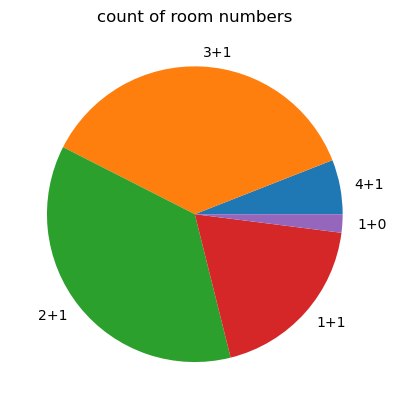

In [12]:
# create pie chart
plt.pie(y, labels=x)
plt.title("count of room numbers")
plt.show()

#### Average of rental house prices in bar plot

In [56]:
prices_mean_of_each_cities = df.groupby("city")["price"].mean()

In [57]:
prices_mean_of_each_cities = pd.DataFrame(prices_mean_of_each_cities)
prices_mean_of_each_cities.head()

,price
city,
Adana,12719.196563
Adıyaman,10314.285714
Afyonkarahisar,8640.310078
Aksaray,5140.000000
Amasya,8192.647059


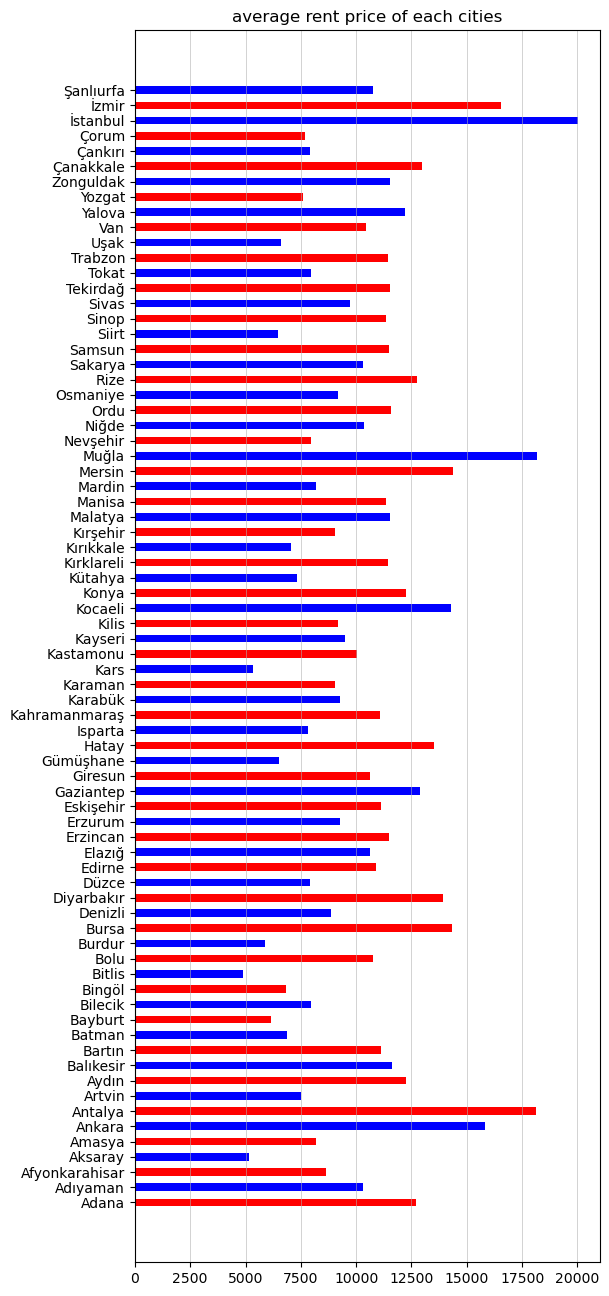

In [63]:
x = prices_mean_of_each_cities.index
y = prices_mean_of_each_cities["price"]

plt.figure(figsize=(6, 16))
plt.grid(linewidth=0.4,  axis="x")

plt.barh(x, y,  height=0.5,  color=["red","blue"])

plt.title("average rent price of each cities")

plt.show()

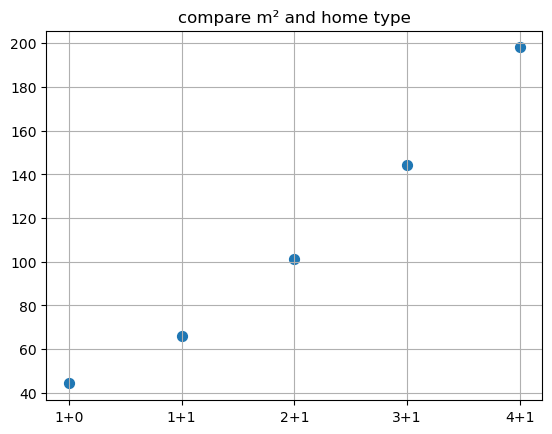

In [53]:
y = df.groupby("room")["m²"].mean()
x = np.array(["1+0", "1+1", "2+1", "3+1", "4+1"])

plt.grid()
plt.title("compare m² and home type")
plt.scatter(x,y, s=50)
plt.show()

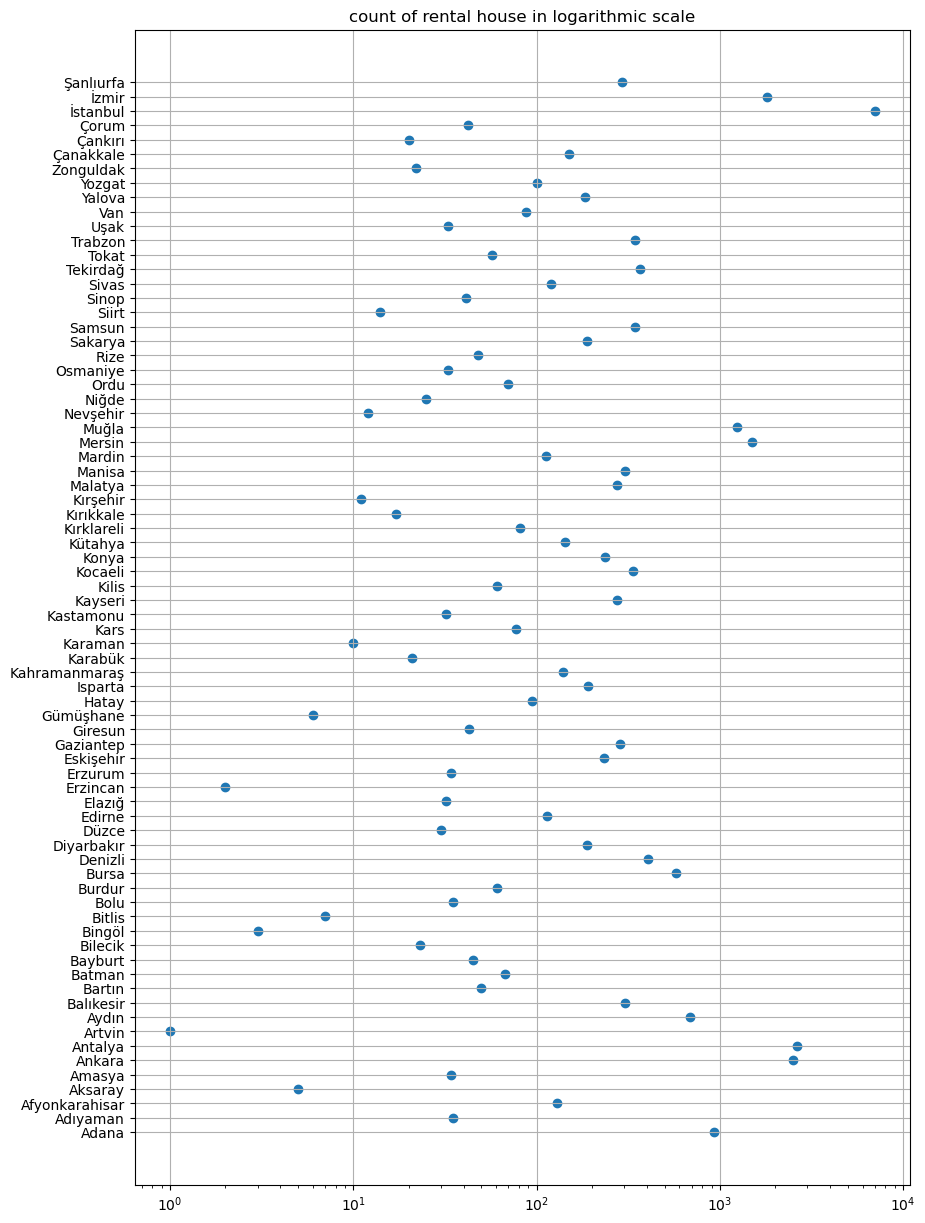

In [124]:
df["constant"] = 1

y = df.groupby("city")["constant"].sum()
x = pd.DataFrame(y).index

plt.figure(figsize=(10, 15))
plt.grid()
plt.xscale("log")

plt.scatter(y, x)
plt.title("count of rental house in logarithmic scale")
plt.show()